# Project 1:  Neural Network
## By Bappa Bhalsing

### Load Basic Librabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import keras

Using TensorFlow backend.


In [4]:
tf.__version__

'2.0.0'

### Load Data Set

In [5]:
# using reference coding to load the data
import h5py

In [6]:
h5f=h5py.File('SVHN_single_grey1.h5',mode='r')

In [7]:
# Views available from member names( help taken from Github)
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [8]:
# Create the data set for local coding
X_train=h5f['X_train'][:]
y_train1=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test1=h5f['y_test'][:]
# create data set for later usage
X_val=h5f['X_val'][:]
y_val=h5f['y_val'][:]

In [9]:
h5f.close()

In [10]:
# Checking shape of subset of Data
X_train.shape

(42000, 32, 32)

Training set have 42000 images of 32 x 32 ( 1024 pixel) i.e 70 % data in Training set.

In [11]:
y_train1.shape

(42000,)

In [12]:
X_test.shape

(18000, 32, 32)

Testing sets have 30% data

In [13]:
y_test1.shape

(18000,)

In [14]:
X_val.shape

(60000, 32, 32)

In [15]:
y_val.shape

(60000,)

In [16]:
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())
print("Max value in X_test:", X_train.max())
print("Min value in X_test:", X_train.min())

Images in X_train: 42000
Images in X_test: 18000
Max value in X_train: 254.9745
Min value in X_train: 0.0
Max value in X_test: 254.9745
Min value in X_test: 0.0


Max Value in data seen is 254.9745 not exactly equal to 255. This might be error in data but data normalisation required while implement NN.

### Basic Image Classification

#### Data Visualisation

7,2,9,0,9,1,8,4,4,8,9,1,4,3,5,8,6,5,5,0,6,5,8,3,2,

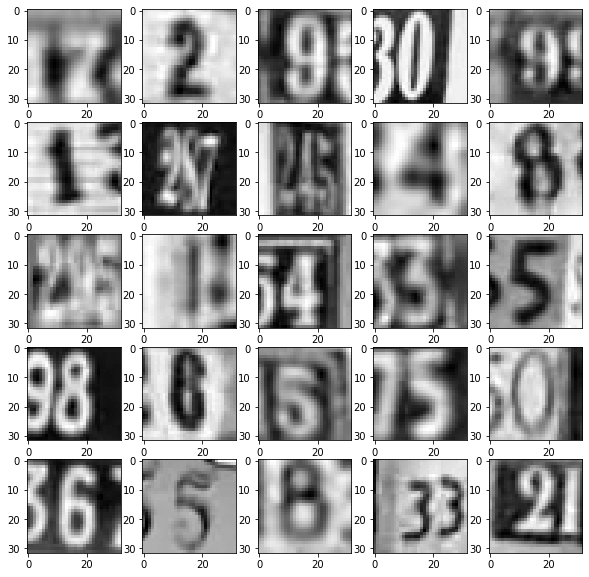

In [17]:
# Data visualisation 
fig=plt.figure(figsize=(10,10))
col=5
ro=5
for i in range(1, col*ro+1):
    image=X_test[i]
    fig.add_subplot(ro,col,i)
    plt.imshow(image,cmap='gray')
    print(y_test1[i] ,end=',')
plt.show()


Checking 25 images from testing Sets with their labels

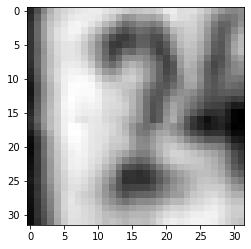

2


In [18]:
# Show a random input with respect to output
i = 9004
plt.imshow(X_train[i,:], cmap = 'gray')
plt.show()
print(y_train1[i])

Randomly checking input image with its label

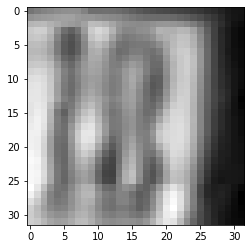

8


In [19]:
# Show a random input
i = 41874
plt.imshow(X_train[i,:], cmap = 'gray')
plt.show()
print(y_train1[i])

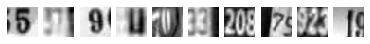

Label of the image is [5 7 9 1 0 3 0 7 2 1] respectively


In [20]:
plt.figure(figsize=(20, 20))
for i in range(21, 31, 1):
    plt.subplot(21, 31, i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
plt.show()
print('Label of the image is %s respectively' % (y_train1[21:31]) )

Checking 10 images selcted from randomly from training sets along with its label.

### Basis FeedForward NN 

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
inputData, y = np.asarray(X_val).reshape(60000, 1024), y_val

In [23]:
inputData = inputData / 254.9745 # Max value of data is 254.9745
nDigits = 10

yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i,int(y[i])]=1

y = yOneHot

m = 42000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]


np.random.seed(1002)

In [24]:
InputData_test.shape

(18000, 1024)

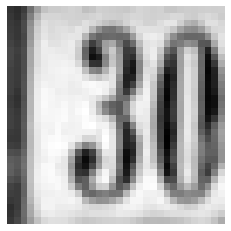

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [25]:
# Show a random input

i = 12000
plt.imshow(InputData_train[i,:].reshape(32,32), cmap ='gray')
plt.axis("off")
plt.show()
print(y_train[i,:])

In [26]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [27]:
InputData_train.shape[0]

42000

In [28]:
inputDim = InputData_train.shape[1]
nHidden = 80
learning_rate = 0.0001
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = InputData_train
y = y_train

In [29]:
InputData_train.shape[1]

1024

Epoch 0 cost:  2.3026606875625157
Epoch 10 cost:  2.3026542770212486
Epoch 20 cost:  2.302648018624604
Epoch 30 cost:  2.3026419083007927
Epoch 40 cost:  2.3026359419115474
Epoch 50 cost:  2.302630113996129
Epoch 60 cost:  2.302624421065153
Epoch 70 cost:  2.302618859146291
Epoch 80 cost:  2.3026134234290523
Epoch 90 cost:  2.3026081093756936


<function matplotlib.pyplot.show(*args, **kw)>

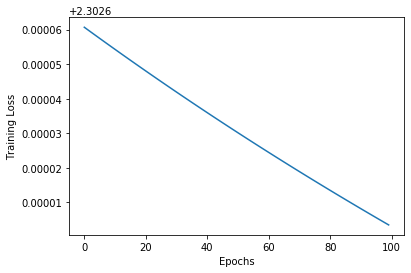

In [30]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

No significant improvement seen after 100th Epoch. I have tried several combination of LR and Epoch but results has been in non significant range.

In [31]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[   0   64   45   37   19   25   32   23   34   34]
 [   0    0    8    5    2    2    0    1    3    7]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0   35   35   25   31   27   59   32   39   30]
 [   0  278  204  251  200  141  114  170  149  142]
 [   0 1032 1204 1118 1057 1153 1091 1246 1079 1132]
 [   0  515  434  456  554  523  574  407  576  471]
 [   0   76   68  107  135  127  129  120  117  182]
 [   0    0    2    1    0    0    0    1    0    0]
 [   0    0    0    0    2    2    1    0    3    2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         0
           3       0.01      0.08      0.02       313
           4       0.10      0.12      0.11      1649
           5       0.58      0.11      0.19     10112
           6       0.29      0.13      0.18      4510
           7       0.06      0.11   

C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bappa.bhalsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Level is Just 12 %.

### Normalising data

In [32]:
X_train = X_train.reshape(X_train.shape[0], 32, 32,1)
X_test = X_test.reshape(X_test.shape[0], 32, 32,1)

In [33]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 254.9745
X_test /= 254.9745

In [34]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())
print("Max value in X_test:", X_train.max())
print("Min value in X_test:", X_train.min())

X_train shape: (42000, 32, 32, 1)
Images in X_train: 42000
Images in X_test: 18000
Max value in X_train: 1.0
Min value in X_train: 0.0
Max value in X_test: 1.0
Min value in X_test: 0.0


### Implement Deep Neural Network

In [35]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

In [36]:
print("Value before encoding:", y_train1[0])

Value before encoding: 2


In [37]:
y_train1 = to_categorical(y_train1, num_classes=10)
y_test1 = to_categorical(y_test1, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

print("Shape of y_train:", y_train1.shape)
print("One hot encoded value of y_train:", y_train1[0])

Shape of y_train: (42000, 10)
One hot encoded value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


- In result also it shows 2

### Begining with basic Level of NN

In [38]:
# Initialize Sequential model
model0 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model0.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

# Normalize the data
# model.add(tf.keras.layers.BatchNormalization())

### Optimisers

In [39]:
adam_optimiser1=tf.keras.optimizers.Adam(lr=0.01)
adam_optimiser2=tf.keras.optimizers.Adam(lr=0.0001)
sgd_optimiser1=tf.keras.optimizers.SGD(lr=0.01)
sgd_optimiser2=tf.keras.optimizers.SGD(lr=0.0001)

Step 1
#### Optimizer: "adam"  with Learning Rate: 0.01
#### Activation Function: "relu"

In [40]:
#Input Layer
model0.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
model0.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model0.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model0.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model0.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model0.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [41]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
Input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 10)                3

In [42]:
model0.compile(optimizer=adam_optimiser1, loss='categorical_crossentropy', metrics=['accuracy']) # adam Lr=0.01

In [43]:
model0.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=10, verbose=1 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 14s 337us/sample - loss: 2.3157 - accuracy: 0.0990 - val_loss: 2.3038 - val_accuracy: 0.1018
Epoch 2/10
42000/42000 [==============================] - 11s 262us/sample - loss: 2.3040 - accuracy: 0.0992 - val_loss: 2.3037 - val_accuracy: 0.1007
Epoch 3/10
42000/42000 [==============================] - 11s 257us/sample - loss: 2.3038 - accuracy: 0.1007 - val_loss: 2.3046 - val_accuracy: 0.0982
Epoch 4/10
42000/42000 [==============================] - 11s 270us/sample - loss: 2.3039 - accuracy: 0.1011 - val_loss: 2.3030 - val_accuracy: 0.1008
Epoch 5/10
42000/42000 [==============================] - 11s 257us/sample - loss: 2.3040 - accuracy: 0.1014 - val_loss: 2.3051 - val_accuracy: 0.0955
Epoch 6/10
42000/42000 [==============================] - 11s 259us/sample - loss: 2.3042 - accuracy: 0.0973 - val_loss: 2.3037 - val_accuracy: 0.0982
Epoch 7/10
42000/42000 [====================

Accuracy level is just 10 % and so need further step wise evaluation of Model.
And Validation Loss 2.3034 which is equivalent earlier step

### Try out SGD optimiser Combination

In [44]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

In [45]:
#Input Layer
model.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
model.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 10)               

In [47]:
model.compile(optimizer=sgd_optimiser1, loss='categorical_crossentropy', metrics=['accuracy']) # sgd Lr=0.01

In [48]:
model.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=10, verbose=1 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 217us/sample - loss: 2.2620 - accuracy: 0.1636 - val_loss: 2.1565 - val_accuracy: 0.2193
Epoch 2/10
42000/42000 [==============================] - 9s 206us/sample - loss: 1.9648 - accuracy: 0.3160 - val_loss: 1.7641 - val_accuracy: 0.4069
Epoch 3/10
42000/42000 [==============================] - 9s 206us/sample - loss: 1.5468 - accuracy: 0.4924 - val_loss: 1.6010 - val_accuracy: 0.4512
Epoch 4/10
42000/42000 [==============================] - 9s 207us/sample - loss: 1.3134 - accuracy: 0.5773 - val_loss: 1.3608 - val_accuracy: 0.5469
Epoch 5/10
42000/42000 [==============================] - 9s 206us/sample - loss: 1.1699 - accuracy: 0.6316 - val_loss: 1.2430 - val_accuracy: 0.6144
Epoch 6/10
42000/42000 [==============================] - 9s 206us/sample - loss: 1.0699 - accuracy: 0.6637 - val_loss: 1.0099 - val_accuracy: 0.6842
Epoch 7/10
42000/42000 [==========================

After executing model for 10 Epoch, Iprovement is seen and accuracy level reached to 69 % Level in validation tuple and 72 % for Traing set
Changes made: SDG optimiser applied 

### Step 3

#### Optimizer: 'adam'
#### Activation: 'relu'
#### Learning Rate: 0.0001

In [49]:
# Initialize Sequential model
modela = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
modela.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

In [50]:
#Input Layer
modela.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
modela.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
modela.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
modela.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
modela.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
modela.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [51]:
modela.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy']) # adam Lr =.0001

In [52]:
modela.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 10)               

In [53]:
modela.fit(X_train, y_train1, validation_data=(X_test, y_test1),batch_size=300, epochs=100, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 82us/sample - loss: 2.2719 - accuracy: 0.1676 - val_loss: 2.2052 - val_accuracy: 0.2752
Epoch 2/100
42000/42000 [==============================] - 3s 69us/sample - loss: 2.0513 - accuracy: 0.3352 - val_loss: 1.8574 - val_accuracy: 0.4324
Epoch 3/100
42000/42000 [==============================] - 3s 69us/sample - loss: 1.6708 - accuracy: 0.4930 - val_loss: 1.5010 - val_accuracy: 0.5550
Epoch 4/100
42000/42000 [==============================] - 3s 69us/sample - loss: 1.4199 - accuracy: 0.5754 - val_loss: 1.3430 - val_accuracy: 0.5832
Epoch 5/100
42000/42000 [==============================] - 3s 70us/sample - loss: 1.2965 - accuracy: 0.6025 - val_loss: 1.2394 - val_accuracy: 0.6311
Epoch 6/100
42000/42000 [==============================] - 3s 71us/sample - loss: 1.2111 - accuracy: 0.6315 - val_loss: 1.1694 - val_accuracy: 0.6493
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4913 - accuracy: 0.8527 - val_loss: 0.6503 - val_accuracy: 0.8147
Epoch 56/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4891 - accuracy: 0.8534 - val_loss: 0.6316 - val_accuracy: 0.8194
Epoch 57/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4820 - accuracy: 0.8551 - val_loss: 0.6577 - val_accuracy: 0.8125
Epoch 58/100
42000/42000 [==============================] - 3s 72us/sample - loss: 0.4813 - accuracy: 0.8548 - val_loss: 0.6425 - val_accuracy: 0.8163
Epoch 59/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4729 - accuracy: 0.8565 - val_loss: 0.6411 - val_accuracy: 0.8201
Epoch 60/100
42000/42000 [==============================] - 3s 71us/sample - loss: 0.4706 - accuracy: 0.8579 - val_loss: 0.6254 - val_accuracy: 0.8231
Epoch 61/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4668 - ac

In [54]:
accuracy = modela.evaluate(X_test, y_test1, verbose=0)
print("Accuracy of NN with adam optimiser & RELu on Validation data is ", accuracy)

Accuracy of NN with adam optimiser & RELu on Validation data is  [0.5969658694399728, 0.8388889]


In [55]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val = pd.DataFrame({'Method':['NN with Adam & RELU'], 'Accuracy': accuracy[1]},index={'1'})
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.838889


Model performance improved after specified Learning Rate of Adam Optimiser.

### Step 4
#### Optimizer: "sgd"  with Learning Rate: 0.001
#### Activation Function: "relu"

In [56]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

In [57]:
#Input Layer
model1.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
model1.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model1.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model1.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model1.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [58]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 10)               

In [59]:
#Compile the model
model1.compile(optimizer=sgd_optimiser2, loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model1.fit(X_train, y_train1, validation_data=(X_test, y_test1),batch_size=300 ,epochs=100, verbose=1 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 80us/sample - loss: 2.3087 - accuracy: 0.1036 - val_loss: 2.3084 - val_accuracy: 0.1062
Epoch 2/100
42000/42000 [==============================] - 3s 66us/sample - loss: 2.3078 - accuracy: 0.1053 - val_loss: 2.3076 - val_accuracy: 0.1083
Epoch 3/100
42000/42000 [==============================] - 3s 68us/sample - loss: 2.3070 - accuracy: 0.1066 - val_loss: 2.3069 - val_accuracy: 0.1089
Epoch 4/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.3064 - accuracy: 0.1072 - val_loss: 2.3064 - val_accuracy: 0.1101
Epoch 5/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.3058 - accuracy: 0.1084 - val_loss: 2.3058 - val_accuracy: 0.1108
Epoch 6/100
42000/42000 [==============================] - 3s 68us/sample - loss: 2.3052 - accuracy: 0.1084 - val_loss: 2.3053 - val_accuracy: 0.1112
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 3s 66us/sample - loss: 2.2960 - accuracy: 0.1118 - val_loss: 2.2973 - val_accuracy: 0.1073
Epoch 56/100
42000/42000 [==============================] - 3s 65us/sample - loss: 2.2959 - accuracy: 0.1119 - val_loss: 2.2972 - val_accuracy: 0.1071
Epoch 57/100
42000/42000 [==============================] - 3s 66us/sample - loss: 2.2958 - accuracy: 0.1116 - val_loss: 2.2971 - val_accuracy: 0.1074
Epoch 58/100
42000/42000 [==============================] - 3s 65us/sample - loss: 2.2957 - accuracy: 0.1120 - val_loss: 2.2970 - val_accuracy: 0.1076
Epoch 59/100
42000/42000 [==============================] - 3s 64us/sample - loss: 2.2955 - accuracy: 0.1120 - val_loss: 2.2969 - val_accuracy: 0.1075
Epoch 60/100
42000/42000 [==============================] - 3s 64us/sample - loss: 2.2954 - accuracy: 0.1115 - val_loss: 2.2968 - val_accuracy: 0.1071
Epoch 61/100
42000/42000 [==============================] - 3s 66us/sample - loss: 2.2953 - ac

In [61]:
accuracy1 = model1.evaluate(X_test, y_test1, verbose=0)
print("Accuracy of NN with SGD Optimiser & RELU on Validation data is ", accuracy1)

Accuracy of NN with SGD Optimiser & RELU on Validation data is  [2.292964732699924, 0.11344445]


In [62]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val1 = pd.DataFrame({'Method':['NN with SGD & RELU'], 'Accuracy': accuracy1[1]},index={'2'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val1])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.838889
2,NN with SGD & RELU,0.113444


Performance of Model with SGD optimiser doesnot have  accuracy at par with Adam optimiser.

Step 3
#### Optimizer: "adam"  with Learning Rate: 0.0001
#### Activation Function: "sigmoid"

In [63]:
# Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

In [64]:
#Input Layer
model2.add(tf.keras.layers.Dense(512, activation='sigmoid', name='Input'))

# Hidden layers
model2.add(tf.keras.layers.Dense(256, activation='sigmoid', name='Layer_1'))
model2.add(tf.keras.layers.Dense(128, activation='sigmoid', name='Layer_2'))


# Hidden layers
model2.add(tf.keras.layers.Dense(64, activation='sigmoid', name='Layer_3'))
model2.add(tf.keras.layers.Dense(32, activation='sigmoid', name='Layer_4'))


#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [65]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 10)               

In [66]:
#Compile the model
model2.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model2.fit(X_train, y_train1, validation_data=(X_test, y_test1),batch_size=300 ,epochs=100, verbose=1 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 85us/sample - loss: 2.3114 - accuracy: 0.1006 - val_loss: 2.3030 - val_accuracy: 0.0955
Epoch 2/100
42000/42000 [==============================] - 3s 74us/sample - loss: 2.3030 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 3/100
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 4/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0955
Epoch 5/100
42000/42000 [==============================] - 3s 74us/sample - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 6/100
42000/42000 [==============================] - 3s 72us/sample - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1016
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 3s 72us/sample - loss: 1.5663 - accuracy: 0.4289 - val_loss: 1.5612 - val_accuracy: 0.4292
Epoch 56/100
42000/42000 [==============================] - 3s 71us/sample - loss: 1.5633 - accuracy: 0.4300 - val_loss: 1.5563 - val_accuracy: 0.4332
Epoch 57/100
42000/42000 [==============================] - 3s 71us/sample - loss: 1.5548 - accuracy: 0.4333 - val_loss: 1.5506 - val_accuracy: 0.4348
Epoch 58/100
42000/42000 [==============================] - 3s 71us/sample - loss: 1.5524 - accuracy: 0.4338 - val_loss: 1.5420 - val_accuracy: 0.4413
Epoch 59/100
42000/42000 [==============================] - 3s 71us/sample - loss: 1.5449 - accuracy: 0.4366 - val_loss: 1.5453 - val_accuracy: 0.4382
Epoch 60/100
42000/42000 [==============================] - 3s 71us/sample - loss: 1.5431 - accuracy: 0.4387 - val_loss: 1.5346 - val_accuracy: 0.4447
Epoch 61/100
42000/42000 [==============================] - 3s 71us/sample - loss: 1.5392 - ac

In [68]:
accuracy2 = model2.evaluate(X_test, y_test1, verbose=0)
print("Accuracy of NN with Adam Optimiser & Sigmoid on Validation data is ", accuracy2)

Accuracy of NN with Adam Optimiser & Sigmoid on Validation data is  [1.3989588811662461, 0.48922223]


In [69]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val2 = pd.DataFrame({'Method':['NN with adam & sigmoid'], 'Accuracy': accuracy2[1]},index={'3'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val2])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.838889
2,NN with SGD & RELU,0.113444
3,NN with adam & sigmoid,0.489222


- Perfromance of Adam optimiser with Signoid Activation Function is not significant.
- So for Batch Normalisation application, Adam with RELU activation has been considered due to high accuracy over Test Data Set.

### Apply Batch Normalisation

In [70]:
model4 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

# Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

Step 1.1
#### Optimizer: "adam"  with Learning Rate: 0.01
#### Activation Function: "relu"

In [71]:
model4.add(tf.keras.layers.Dense(512, activation='relu', name='input'))

# Hidden layers
model4.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model4.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model4.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model4.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model4.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [72]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)               

In [73]:
# Adam Optimiser with Lr= 0.0001
model4.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy']) 

In [74]:
model4.fit(X_train, y_train1, validation_data=(X_test, y_test1),batch_size=300, epochs=100, verbose=1 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 122us/sample - loss: 1.5990 - accuracy: 0.4571 - val_loss: 1.5030 - val_accuracy: 0.6530
Epoch 2/100
42000/42000 [==============================] - 5s 109us/sample - loss: 0.9820 - accuracy: 0.6989 - val_loss: 1.0180 - val_accuracy: 0.7198
Epoch 3/100
42000/42000 [==============================] - 5s 119us/sample - loss: 0.8192 - accuracy: 0.7534 - val_loss: 0.8257 - val_accuracy: 0.7589
Epoch 4/100
42000/42000 [==============================] - 4s 102us/sample - loss: 0.7302 - accuracy: 0.7813 - val_loss: 0.7600 - val_accuracy: 0.7744
Epoch 5/100
42000/42000 [==============================] - 4s 103us/sample - loss: 0.6740 - accuracy: 0.7961 - val_loss: 0.7378 - val_accuracy: 0.7804
Epoch 6/100
42000/42000 [==============================] - 5s 113us/sample - loss: 0.6269 - accuracy: 0.8102 - val_loss: 0.7121 - val_accuracy: 0.7917
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 4s 102us/sample - loss: 0.1173 - accuracy: 0.9661 - val_loss: 0.7413 - val_accuracy: 0.8433
Epoch 55/100
42000/42000 [==============================] - 4s 103us/sample - loss: 0.1106 - accuracy: 0.9683 - val_loss: 0.7261 - val_accuracy: 0.8442
Epoch 56/100
42000/42000 [==============================] - 4s 102us/sample - loss: 0.1035 - accuracy: 0.9702 - val_loss: 0.7759 - val_accuracy: 0.8375
Epoch 57/100
42000/42000 [==============================] - 4s 102us/sample - loss: 0.1046 - accuracy: 0.9697 - val_loss: 0.7794 - val_accuracy: 0.8418
Epoch 58/100
42000/42000 [==============================] - 4s 103us/sample - loss: 0.1009 - accuracy: 0.9711 - val_loss: 0.7613 - val_accuracy: 0.8419
Epoch 59/100
42000/42000 [==============================] - 4s 104us/sample - loss: 0.0935 - accuracy: 0.9737 - val_loss: 0.7773 - val_accuracy: 0.8428
Epoch 60/100
42000/42000 [==============================] - 5s 112us/sample - loss: 0.0919 - accuracy

Accuracy of Model is 98 % over train tuple but Validation accuracy over test sample is 84 % This seems model overfit model

In [75]:
accuracy3 = model4.evaluate(X_test, y_test1, verbose=0)
print("Accuracy of NN with Adam Optimiser in Batch norm on Validation data is ", accuracy3)

Accuracy of NN with Adam Optimiser in Batch norm on Validation data is  [1.0396788690475127, 0.8402778]


In [76]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val3 = pd.DataFrame({'Method':['NN with Adam in Batch Norm(RELU)'], 'Accuracy': accuracy3[1]},index={'4'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val3])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.838889
2,NN with SGD & RELU,0.113444
3,NN with adam & sigmoid,0.489222
4,NN with Adam in Batch Norm(RELU),0.840278


#### By seeing above accuracy level of Models, Adam Optimiser with RELU has seen better accuracy level than SGD with RELU and Adam with Sigmoid

#### In next step, RELU with Adam optimiser in with Leraning Rate = 0.0001 and adding drop out step in the NN.

#### Optimizer: 'adam'
#### Activation: 'relu'
#### Learning Rate: 0.0001
#### Batch Norm and Drop Out

In [77]:
model5 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model5.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

# Normalize the data
model5.add(tf.keras.layers.BatchNormalization())

In [78]:
model5.add(tf.keras.layers.Dense(512, activation='relu', name='input'))

# Hidden layers
model5.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model5.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))

# Dropout layer
model5.add(tf.keras.layers.Dropout(0.5))


# Hidden layers
model5.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model5.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))
# Dropout layer
model5.add(tf.keras.layers.Dropout(0.3))

#Output layer
model5.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [79]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 64)               

In [80]:
# Adam Optimiser with Lr= 0.0001
model5.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy']) 

In [81]:
model5.fit(X_train, y_train1, validation_data=(X_test, y_test1),batch_size=300, epochs=100, verbose=1 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 126us/sample - loss: 2.2589 - accuracy: 0.1471 - val_loss: 2.1719 - val_accuracy: 0.2889
Epoch 2/100
42000/42000 [==============================] - 4s 104us/sample - loss: 1.9157 - accuracy: 0.2970 - val_loss: 1.7344 - val_accuracy: 0.5008
Epoch 3/100
42000/42000 [==============================] - 4s 104us/sample - loss: 1.6279 - accuracy: 0.4292 - val_loss: 1.3250 - val_accuracy: 0.6163
Epoch 4/100
42000/42000 [==============================] - 5s 114us/sample - loss: 1.4201 - accuracy: 0.5192 - val_loss: 1.1133 - val_accuracy: 0.6826
Epoch 5/100
42000/42000 [==============================] - 4s 105us/sample - loss: 1.2749 - accuracy: 0.5835 - val_loss: 0.9879 - val_accuracy: 0.7156
Epoch 6/100
42000/42000 [==============================] - 4s 104us/sample - loss: 1.1624 - accuracy: 0.6255 - val_loss: 0.9119 - val_accuracy: 0.7370
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 6s 143us/sample - loss: 0.3381 - accuracy: 0.9001 - val_loss: 0.5834 - val_accuracy: 0.8519
Epoch 55/100
42000/42000 [==============================] - 6s 147us/sample - loss: 0.3346 - accuracy: 0.9006 - val_loss: 0.5810 - val_accuracy: 0.8502
Epoch 56/100
42000/42000 [==============================] - 7s 166us/sample - loss: 0.3357 - accuracy: 0.9015 - val_loss: 0.5816 - val_accuracy: 0.8503
Epoch 57/100
42000/42000 [==============================] - 5s 121us/sample - loss: 0.3269 - accuracy: 0.9033 - val_loss: 0.5797 - val_accuracy: 0.8528
Epoch 58/100
42000/42000 [==============================] - 4s 101us/sample - loss: 0.3215 - accuracy: 0.9042 - val_loss: 0.5888 - val_accuracy: 0.8512
Epoch 59/100
42000/42000 [==============================] - 4s 103us/sample - loss: 0.3168 - accuracy: 0.9053 - val_loss: 0.5932 - val_accuracy: 0.8514
Epoch 60/100
42000/42000 [==============================] - 4s 100us/sample - loss: 0.3138 - accuracy

Model gives accuracy of 94 % on training data and 85 % on test data. Gap in minimum one and seems model is slightly overfit.

In [82]:
accuracy4 = model5.evaluate(X_test, y_test1, verbose=0)
print("Accuracy of NN with Adam Optimiser in Batch norm with Drop out on Validation data is ", accuracy4)

Accuracy of NN with Adam Optimiser in Batch norm with Drop out on Validation data is  [0.7282719859464301, 0.8500556]


In [83]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val4 = pd.DataFrame({'Method':['NN with Adam in Batch Norm & dropout(RELU)'], 'Accuracy': accuracy4[1]},index={'5'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val4])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.838889
2,NN with SGD & RELU,0.113444
3,NN with adam & sigmoid,0.489222
4,NN with Adam in Batch Norm(RELU),0.840278
5,NN with Adam in Batch Norm & dropout(RELU),0.850056


- Final results indicates that Sr No 5 NN with Adam in Bath Normalisation & Dropout condition gives highest result over test tuple.

In [84]:
y_predict=model5.predict(X_test)

In [85]:
y_predict[1000]

array([2.3445382e-03, 1.2589678e-01, 9.1851978e-03, 3.0123135e-02,
       3.5421837e-03, 3.0088222e-03, 8.0236443e-04, 8.2107991e-01,
       5.5539003e-04, 3.4617498e-03], dtype=float32)

Its prediction for 1

In [86]:
y_test1[1000]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Label is also 1

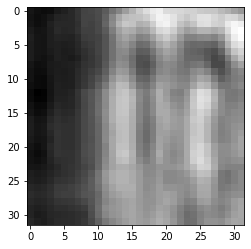

In [87]:
# Show a random input with respect to output

i = 1000
plt.imshow(X_test[i,:].reshape(32,32), cmap = 'gray')
plt.show()

Actual image is also 1

In [88]:
y_predict[12000]

array([1.9586350e-32, 7.9929051e-26, 1.2492150e-22, 1.0000000e+00,
       3.1373043e-30, 3.8209764e-18, 2.5109384e-33, 1.8877749e-30,
       1.3334114e-19, 2.6994522e-24], dtype=float32)

Its prediction for 3

In [89]:
y_test1[12000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Actual lable is 3

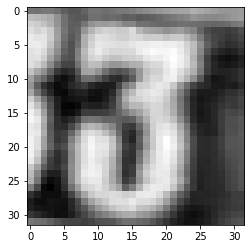

In [90]:
plt.imshow(X_test[12000].reshape(32,32), cmap = 'gray')
plt.show()

Actual image is also 3

In [91]:
predictions = np.argmax(y_predict, axis=0)
labels = np.argmax(y_test1.T, axis=0)

In [102]:
#print(confusion_matrix(predictions, labels,normalize='True'))
#print(classification_report(predictions, labels))

#This code can't get executed properly due to error

### Evaluating  of NN and Final Conclusion Note

- Performance of NN has been significantly increased over after change in Learning Rate of both optimiser.
- Performance of SGD optimiser in not found sigfinacant so not considered for further analysis.
- Sigmoid Activation with Adam result is found very less accuracy level.
- In this project SVM and KNN classifier has been tried but the code can not executed after 6 to 7 hours and found limitation over personal Machine with 4 GB RAM and i5 processor.


### Recommendation
- NN with Adam optimizer at Lr 0.0001 in Batch Normalisation condition with 2 drop out layer ( first with 0.5 and second 0.3) has seen better performance and accuracy level acheived is 85.5 % on test sets and 94 % on training data.